# RF

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
file_path_RFL = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_RFL = pd.read_csv(file_path_RFL)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'FSO_Att' in data_RFL.columns:
    data_RFL = data_RFL.drop(['FSO_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 3 for FSO
filtered_data_RFL = data_RFL[data_RFL['SYNOPCode'] == 3]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_RFL= pd.get_dummies(filtered_data_RFL, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_RFL.columns:
    df_RFL['sin_time'] = np.sin(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL['cos_time'] = np.cos(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_RFL


,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_3,sin_time,cos_time
1116,9.043323,20.244567,20.819340,18.475689,2115.667536,83500000000,0.0,0.0,0.0,0.0,...,141.152237,154.806868,129.044488,89.986054,0.076957,0.684638,0.072223,1,-0.965926,-0.258819
3745,6.088839,20.164626,20.833908,19.261558,2119.138170,73500000000,0.0,0.0,0.0,0.0,...,2936.215800,2985.174438,2898.281083,103.503641,0.274992,0.753250,0.254561,1,-0.965926,-0.258819
5409,8.094719,17.515085,18.017632,16.110214,2962.180194,73500000000,0.0,0.0,0.0,0.0,...,26762.246420,27056.350834,24252.617383,99.446719,0.476145,0.943513,0.474088,1,-0.500000,-0.866025
5414,8.001488,17.796149,18.858701,17.232316,2964.409031,83500000000,0.0,0.0,0.0,0.0,...,9383.749728,9504.425544,8736.247346,50.994814,0.172512,0.584785,0.161008,1,-0.500000,-0.866025
5418,8.062292,17.943657,17.995399,16.521335,2963.216445,83500000000,0.0,0.0,0.0,0.0,...,578.014621,598.699391,577.802421,104.418343,0.000000,0.091539,0.000000,1,-0.707107,-0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78379,12.711575,4.636653,4.700021,4.519128,4825.164075,73500000000,0.0,0.0,0.0,0.0,...,1848.262236,1869.723604,1697.162316,85.261099,0.015896,0.025341,0.014470,1,0.866025,0.500000
78380,12.316199,4.588537,4.625096,4.318343,4827.289403,83500000000,0.0,0.0,0.0,0.0,...,1648.870241,1812.208227,1552.672739,99.470423,0.132506,0.266973,0.128366,1,0.866025,0.500000
78381,13.253359,4.727778,4.940151,4.540771,4818.044163,73500000000,0.0,0.0,0.0,0.0,...,2592.916108,2826.084363,2496.994303,81.380582,0.146400,0.290531,0.139779,1,0.866025,0.500000
78382,12.313026,4.697691,4.956181,4.630608,4823.899772,83500000000,0.0,0.0,0.0,0.0,...,2718.073152,2943.844915,2491.009485,65.295172,0.077787,0.191556,0.070718,1,0.866025,0.500000


In [2]:

# Split the FSO data into features and target
X_RFL= df_RFL.drop(['RFL_Att'], axis=1)  # Features for FSO
y_RFL= df_RFL['RFL_Att']  # Target for FSO

In [3]:
# Split the FSO data into training and test sets
X_train_RFL, X_test_RFL, y_train_RFL, y_test_RFL = train_test_split(X_RFL, y_RFL, test_size=0.3, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_RFL = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_RFL = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_RFL = RandomizedSearchCV(
    estimator=rf_RFL,
    param_distributions=param_distributions_RFL,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_RFL.fit(X_train_RFL, y_train_RFL)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026F86363650>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026F86362950>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026F863632D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026FFF9FBFD0>},
                   random_state=42, verbose=1)

In [4]:
# The best hyperparameters and score for FSO
best_params_RFL = random_search_RFL.best_params_
best_score_RFL= random_search_RFL.best_score_
print(f"Best hyperparameters for FSO: {best_params_RFL}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_RFL}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 288}
Best OOB score from RandomizedSearchCV for FSO: 0.9546071445120481


In [5]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL = pd.DataFrame(X_train_RFL, columns=df_RFL.drop('RFL_Att', axis=1).columns)
train_df_RFL['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL= rank_variables_oob(train_df_RFL, 'RFL_Att', best_params_RFL)
print(rankings_table_RFL)


         Removed Variable     RSMSE       R^2  Remaining Variables
5        RainIntensityMin  0.609308  0.957264                   20
15              Frequency  0.613976  0.956606                   10
10          WindDirection  0.616223  0.956288                   15
7            WindSpeedMin  0.616548  0.956242                   18
12             Visibility  0.618959  0.955899                   13
8               WindSpeed  0.620132  0.955732                   17
6             SYNOPCode_3  0.620977  0.955611                   19
13               Distance  0.622496  0.955394                   12
4        RainIntensityMax  0.623953  0.955185                   21
14          VisibilityMin  0.624537  0.955101                   11
16          VisibilityMax  0.625287  0.954993                    9
11               cos_time  0.627262  0.954708                   14
9            WindSpeedMax  0.629347  0.954406                   16
0             Particulate  0.629475  0.954388                 

In [6]:
FSO_table=rankings_table_RFL
rankings_table_RFL 

,Removed Variable,RSMSE,R^2,Remaining Variables
5,RainIntensityMin,0.609308,0.957264,20
15,Frequency,0.613976,0.956606,10
10,WindDirection,0.616223,0.956288,15
7,WindSpeedMin,0.616548,0.956242,18
12,Visibility,0.618959,0.955899,13
8,WindSpeed,0.620132,0.955732,17
6,SYNOPCode_3,0.620977,0.955611,19
13,Distance,0.622496,0.955394,12
4,RainIntensityMax,0.623953,0.955185,21
14,VisibilityMin,0.624537,0.955101,11


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_26040\2253993150.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


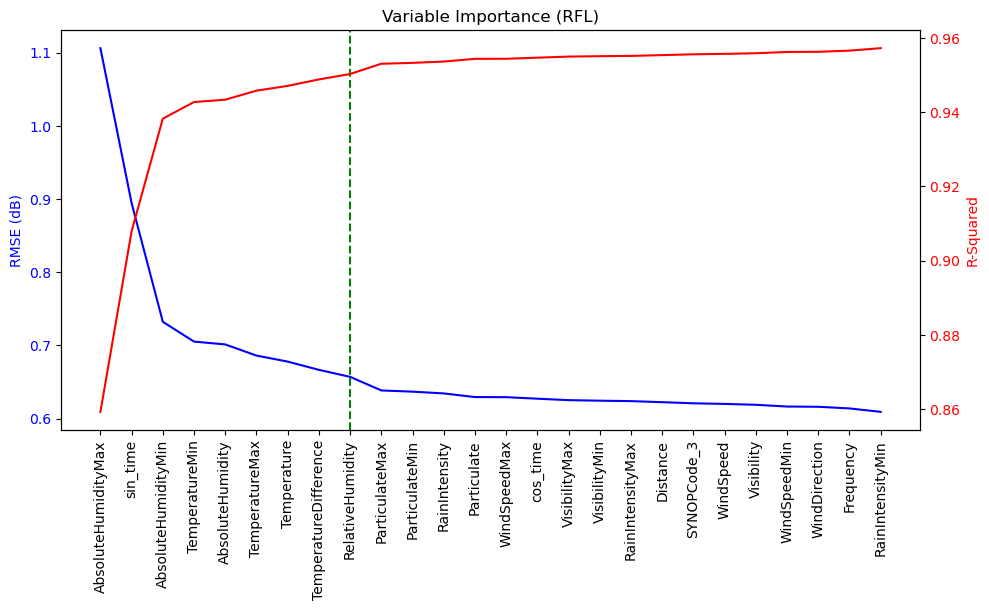

In [7]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')

ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 8
cutoff_variable = rankings_table_sorted_RFL.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance (RFL)')
plt.show()


In [8]:
selected_features_RFL= [
    'Visibility',
    'RelativeHumidity',
    'AbsoluteHumidityMin',
    'TemperatureMin',
    'TemperatureDifference',
    'AbsoluteHumidityMax',
    'TemperatureMax',
    'AbsoluteHumidity',
    'sin_time'
]

In [9]:
# Select only the chosen features for training and testing
X_train_selected_RFL = X_train_RFL[selected_features_RFL]
X_test_selected_RFL = X_test_RFL[selected_features_RFL]

# Retrain the model with the selected features and best hyperparameters
final_model_RFL= RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_RFL = final_model_RFL.predict(X_test_selected_RFL)

# Calculate RMSE and R-squared on the testing set
test_rmse_RFL= mean_squared_error(y_test_RFL, predictions_RFL, squared=False)
test_r2_RFL = r2_score(y_test_RFL, predictions_RFL)

print(f"Test RMSE: {test_rmse_RFL}")
print(f"Test R^2: {test_r2_RFL}")


Test RMSE: 0.43831804973955135
Test R^2: 0.9799907130605703


# FSO

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
fso_file_path = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_FSO = pd.read_csv(fso_file_path)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'RFL_Att' in data_FSO.columns:
    data_FSO = data_FSO.drop(['RFL_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 3 for FSO
filtered_data_FSO = data_FSO[data_FSO['SYNOPCode'] == 3]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_FSO = pd.get_dummies(filtered_data_FSO, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_FSO.columns:
    df_FSO['sin_time'] = np.sin(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO['cos_time'] = np.cos(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_FSO


,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_3,sin_time,cos_time
1116,13.997498,20.244567,20.819340,18.475689,2115.667536,83500000000,0.0,0.0,0.0,0.0,...,141.152237,154.806868,129.044488,89.986054,0.076957,0.684638,0.072223,1,-0.965926,-0.258819
3745,10.946154,20.164626,20.833908,19.261558,2119.138170,73500000000,0.0,0.0,0.0,0.0,...,2936.215800,2985.174438,2898.281083,103.503641,0.274992,0.753250,0.254561,1,-0.965926,-0.258819
5409,7.419227,17.515085,18.017632,16.110214,2962.180194,73500000000,0.0,0.0,0.0,0.0,...,26762.246420,27056.350834,24252.617383,99.446719,0.476145,0.943513,0.474088,1,-0.500000,-0.866025
5414,7.473629,17.796149,18.858701,17.232316,2964.409031,83500000000,0.0,0.0,0.0,0.0,...,9383.749728,9504.425544,8736.247346,50.994814,0.172512,0.584785,0.161008,1,-0.500000,-0.866025
5418,7.892708,17.943657,17.995399,16.521335,2963.216445,83500000000,0.0,0.0,0.0,0.0,...,578.014621,598.699391,577.802421,104.418343,0.000000,0.091539,0.000000,1,-0.707107,-0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78379,10.298313,4.636653,4.700021,4.519128,4825.164075,73500000000,0.0,0.0,0.0,0.0,...,1848.262236,1869.723604,1697.162316,85.261099,0.015896,0.025341,0.014470,1,0.866025,0.500000
78380,10.361821,4.588537,4.625096,4.318343,4827.289403,83500000000,0.0,0.0,0.0,0.0,...,1648.870241,1812.208227,1552.672739,99.470423,0.132506,0.266973,0.128366,1,0.866025,0.500000
78381,9.741072,4.727778,4.940151,4.540771,4818.044163,73500000000,0.0,0.0,0.0,0.0,...,2592.916108,2826.084363,2496.994303,81.380582,0.146400,0.290531,0.139779,1,0.866025,0.500000
78382,9.439828,4.697691,4.956181,4.630608,4823.899772,83500000000,0.0,0.0,0.0,0.0,...,2718.073152,2943.844915,2491.009485,65.295172,0.077787,0.191556,0.070718,1,0.866025,0.500000


In [12]:

# Split the FSO data into features and target
X_FSO = df_FSO.drop(['FSO_Att'], axis=1)  # Features for FSO
y_FSO = df_FSO['FSO_Att']  # Target for FSO

In [13]:
# Split the FSO data into training and test sets
X_train_FSO, X_test_FSO, y_train_FSO, y_test_FSO = train_test_split(X_FSO, y_FSO, test_size=0.3, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_FSO = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_FSO = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_FSO = RandomizedSearchCV(
    estimator=rf_FSO,
    param_distributions=param_distributions_FSO,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_FSO.fit(X_train_FSO, y_train_FSO)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026F8962A790>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026F89CEE150>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026F89CEF410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026F86E6CC90>},
                   random_state=42, verbose=1)

In [14]:
# The best hyperparameters and score for FSO
best_params_FSO = random_search_FSO.best_params_
best_score_FSO = random_search_FSO.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.8176057957613263


In [15]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO = pd.DataFrame(X_train_FSO, columns=df_FSO.drop('FSO_Att', axis=1).columns)
train_df_FSO['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO = rank_variables_oob(train_df_FSO, 'FSO_Att', best_params_FSO)
print(rankings_table_FSO)


         Removed Variable     RSMSE       R^2  Remaining Variables
16               cos_time  2.669921  0.881475                    9
18               sin_time  2.680016  0.880577                    7
15         TemperatureMin  2.682642  0.880343                   10
14           WindSpeedMax  2.689229  0.879754                   11
11       AbsoluteHumidity  2.698247  0.878947                   14
12         TemperatureMax  2.705677  0.878279                   13
9           WindDirection  2.707739  0.878093                   16
17  TemperatureDifference  2.710064  0.877884                    8
10           WindSpeedMin  2.714916  0.877446                   15
13    AbsoluteHumidityMin  2.722987  0.876716                   12
0             Particulate  2.735981  0.875537                   25
3           RainIntensity  2.741286  0.875054                   22
6             SYNOPCode_3  2.741337  0.875049                   19
8               WindSpeed  2.741443  0.875040                 

In [16]:
FSO_table=rankings_table_FSO 
rankings_table_FSO 

,Removed Variable,RSMSE,R^2,Remaining Variables
16,cos_time,2.669921,0.881475,9
18,sin_time,2.680016,0.880577,7
15,TemperatureMin,2.682642,0.880343,10
14,WindSpeedMax,2.689229,0.879754,11
11,AbsoluteHumidity,2.698247,0.878947,14
12,TemperatureMax,2.705677,0.878279,13
9,WindDirection,2.707739,0.878093,16
17,TemperatureDifference,2.710064,0.877884,8
10,WindSpeedMin,2.714916,0.877446,15
13,AbsoluteHumidityMin,2.722987,0.876716,12


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_26040\1066357725.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)


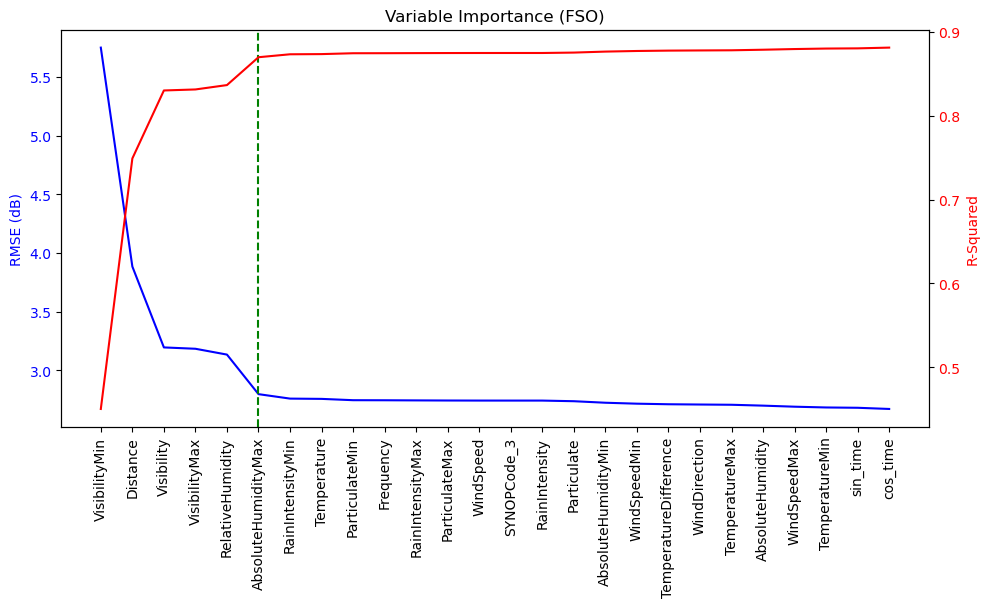

In [17]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 5
cutoff_variable = rankings_table_sorted_FSO.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')
fig.tight_layout()  # For better spacing
plt.title('Variable Importance (FSO)')

plt.show()


In [18]:
selected_features_FSO = [
    'RainIntensityMin', 
    'RelativeHumidity', 
    'Visibility',
    'Distance',
    'VisibilityMin',
    'VisibilityMax'
    # Add 'ParticulateMax' if you decide to keep it based on domain knowledge
]


In [19]:
# Select only the chosen features for training and testing
X_train_selected_FSO = X_train_FSO[selected_features_FSO]
X_test_selected_FSO = X_test_FSO[selected_features_FSO]

# Retrain the model with the selected features and best hyperparameters
final_model_FSO = RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_FSO = final_model_FSO.predict(X_test_selected_FSO)

# Calculate RMSE and R-squared on the testing set
test_rmse_FSO = mean_squared_error(y_test_FSO, predictions_FSO, squared=False)
test_r2_FSO = r2_score(y_test_FSO, predictions_FSO)

print(f"Test RMSE: {test_rmse_FSO}")
print(f"Test R^2: {test_r2_FSO}")


Test RMSE: 3.0870474688634033
Test R^2: 0.8825766689066665


# Plot

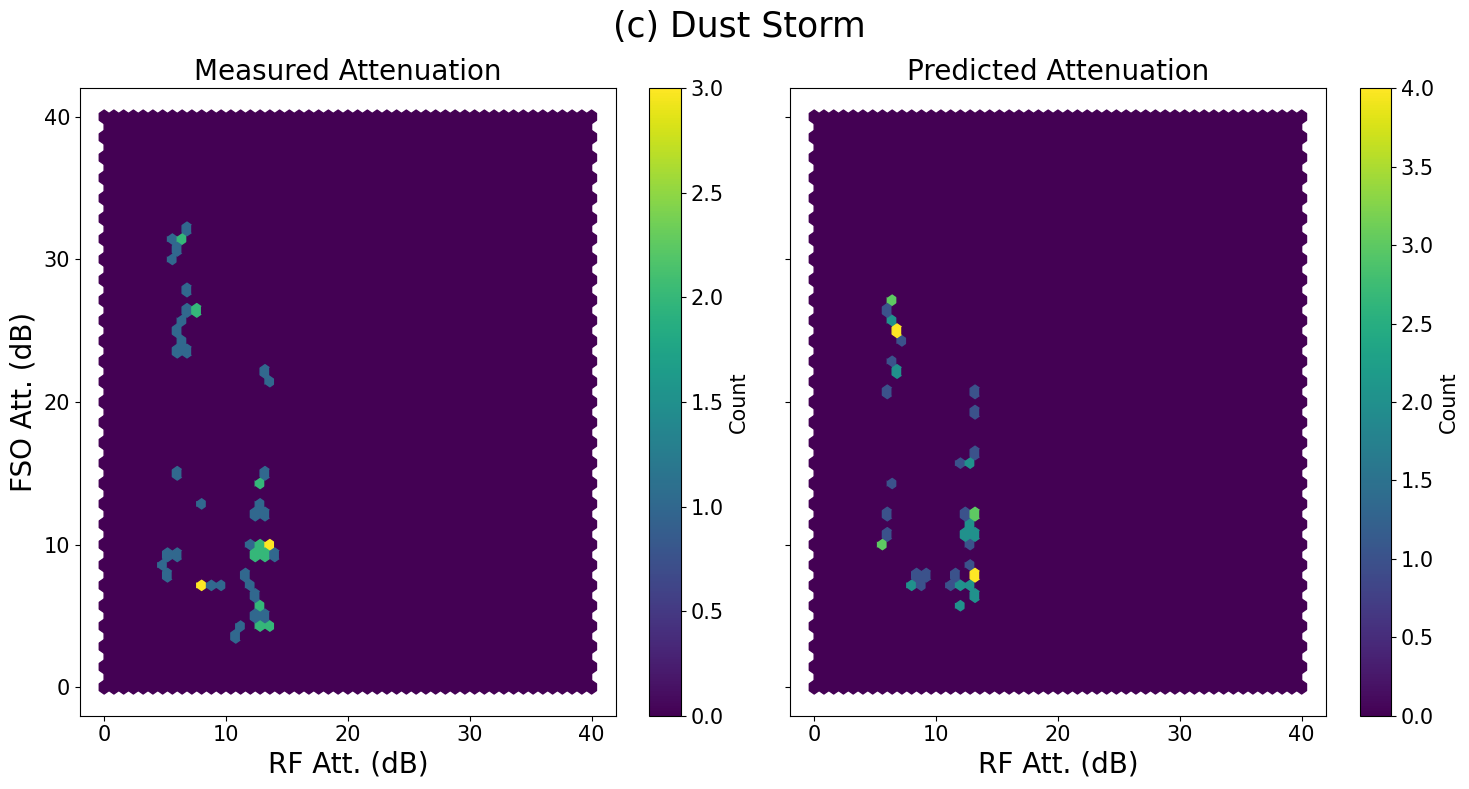

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are the numpy arrays you've prepared with your data
measured_attenuation_RFL = np.array(y_test_RFL)
predicted_attenuation_RFL = np.array(predictions_RFL)
measured_attenuation_FSO = np.array(y_test_FSO)
predicted_attenuation_FSO = np.array(predictions_FSO)

# Set up the matplotlib figure (adjust figsize to closely match the aspect ratio of the example image)
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Define the extent and ticks for the plots
extent = [0, 40, 0, 40]
ticks = [0, 10, 20, 30, 40]

# Heatmap for Measured FSO Attenuation vs RF Attenuation
hb1 = ax[0].hexbin(measured_attenuation_RFL, measured_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[0].set_title('Measured Attenuation', fontsize=20)
ax[0].set_xlabel('RF Att. (dB)', fontsize=20)
ax[0].set_ylabel('FSO Att. (dB)', fontsize=20)
ax[0].set_xticks(ticks)
ax[0].set_yticks(ticks)
cb1 = fig.colorbar(hb1, ax=ax[0])
cb1.set_label('Count', fontsize=15)

# Heatmap for Predicted FSO Attenuation vs RF Attenuation
hb2 = ax[1].hexbin(predicted_attenuation_RFL, predicted_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[1].set_title('Predicted Attenuation', fontsize=20)
ax[1].set_xlabel('RF Att. (dB)', fontsize=20)
ax[1].set_xticks(ticks)
ax[1].set_yticks(ticks)  # This may be redundant since y-axis is shared with the first plot
cb2 = fig.colorbar(hb2, ax=ax[1])
cb2.set_label('Count', fontsize=15)

plt.suptitle('(c) Dust Storm ',fontsize=25)


ax[0].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
ax[1].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
cb1.ax.tick_params(labelsize=15) 
cb2.ax.tick_params(labelsize=15) 
plt.tight_layout()
plt.show()


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_26040\1756172510.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_26040\1756172510.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


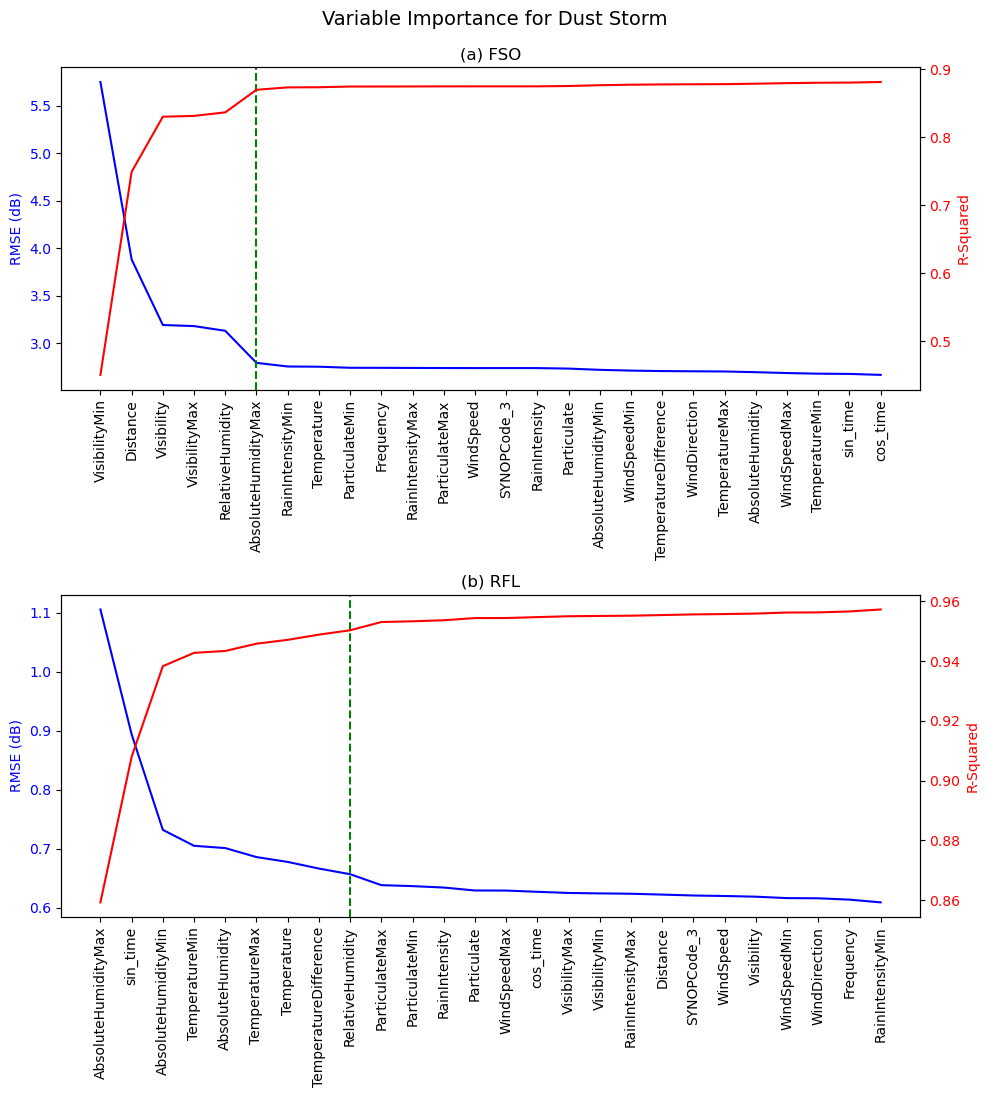

In [22]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Creating subplots with FSO on top and RFL at the bottom

# Plot for FSO
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax1.set_title('(a) FSO')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 5  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO.loc[cutoff_index_FSO, 'Removed Variable']
ax1.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Plot for RFL
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)
ax2.set_title('(b) RFL')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 8  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL.loc[cutoff_index_RFL, 'Removed Variable']
ax2.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance for Dust Storm', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()


# Method 2 (RFL)

## train

In [23]:
# Continue from where you've trained the final model on RFL data
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

# Generate Predicted RFL Attenuation on the training data
predicted_FSO_train_2 = final_model_FSO.predict(X_train_selected_FSO)
X_train_RFL['Predicted_FSO_Att_2'] = predicted_FSO_train_2  # Enhance the FSO training dataset

# Use final_model_FSO to predict FSO attenuation on the test data
predicted_FSO_test_2 = final_model_FSO.predict(X_test_selected_FSO)
X_test_RFL['Predicted_FSO_Att_2'] = predicted_FSO_test_2


# Define the parameter space and optimize parameters for a new RandomForest model
param_distributions_RFL_2 = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True]  # Enable bootstrap
}
rf_RFL_2 = RandomForestRegressor(random_state=42, oob_score=True)
random_search_RFL_2 = RandomizedSearchCV(
    estimator=rf_RFL_2,
    param_distributions=param_distributions_RFL_2,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
# Make sure to use the correct training data and labels for FSO
random_search_RFL_2.fit(X_train_RFL, y_train_RFL)  

# Retrieve and apply the best hyperparameters
best_params_RFL_2 = random_search_RFL_2.best_params_
best_score_RFL_2 = random_search_RFL_2.best_score_
print(f"Best hyperparameters for RFL: {best_params_RFL_2}")
print(f"Best OOB score from RandomizedSearchCV for RFL: {best_score_RFL_2}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for RFL: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for RFL: 0.9512047572057398


In [24]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL_2 = pd.DataFrame(X_train_RFL, columns=X_train_RFL.columns)
train_df_RFL_2['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL_2= rank_variables_oob(train_df_RFL_2, 'RFL_Att', best_params_RFL_2)
print(rankings_table_RFL_2)


         Removed Variable     RSMSE       R^2  Remaining Variables
15              Frequency  0.605434  0.957805                   11
14          VisibilityMax  0.607801  0.957475                   12
13               Distance  0.609283  0.957267                   13
9               WindSpeed  0.613736  0.956640                   17
7            WindSpeedMin  0.613740  0.956640                   19
12          VisibilityMin  0.616944  0.956186                   14
4        RainIntensityMax  0.618823  0.955918                   22
17    Predicted_FSO_Att_2  0.619448  0.955829                    9
2          ParticulateMin  0.620489  0.955681                   24
16             Visibility  0.622892  0.955337                   10
11               cos_time  0.623730  0.955217                   15
1          ParticulateMax  0.624646  0.955085                   25
0             Particulate  0.624986  0.955036                   26
10          WindDirection  0.625190  0.955007                 

In [25]:
rankings_table_RFL_2

,Removed Variable,RSMSE,R^2,Remaining Variables
15,Frequency,0.605434,0.957805,11
14,VisibilityMax,0.607801,0.957475,12
13,Distance,0.609283,0.957267,13
9,WindSpeed,0.613736,0.956640,17
7,WindSpeedMin,0.613740,0.956640,19
12,VisibilityMin,0.616944,0.956186,14
4,RainIntensityMax,0.618823,0.955918,22
17,Predicted_FSO_Att_2,0.619448,0.955829,9
2,ParticulateMin,0.620489,0.955681,24
16,Visibility,0.622892,0.955337,10


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_26040\690307066.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)


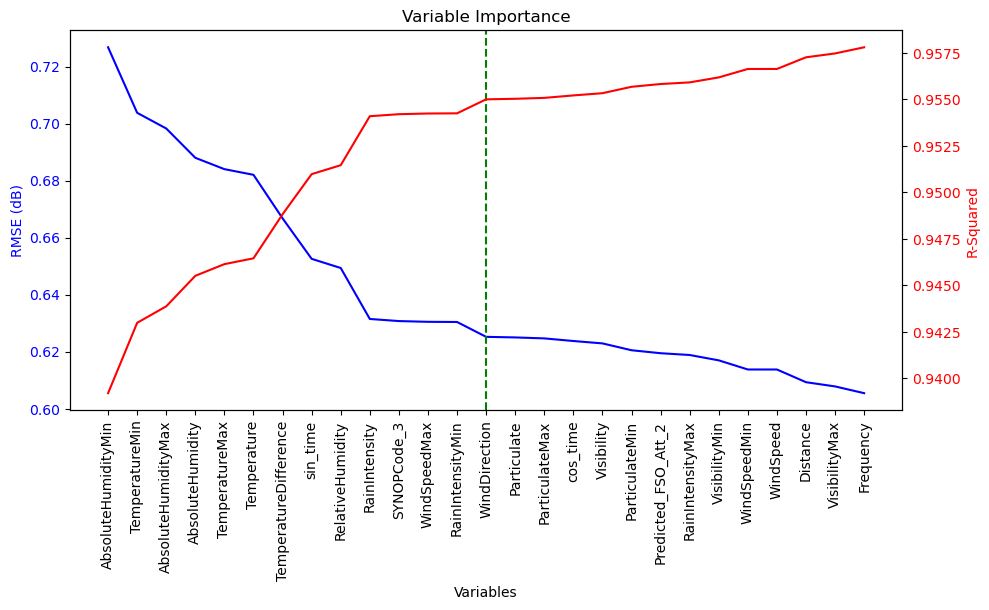

In [26]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL_2 = rankings_table_RFL_2.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 13
cutoff_variable = rankings_table_sorted_RFL_2.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [27]:
selected_features_RFL_2= [
    'WindDirection',
    'RainIntensityMin',
    'WindSpeedMax',
    'SYNOPCode_3',
    'RainIntensity',
    'RelativeHumidity',
    'sin_time',
    'TemperatureDifference',
    'Temperature',
    'TemperatureMax',
    'AbsoluteHumidity',
    'AbsoluteHumidityMax',
    'TemperatureMin',
    'AbsoluteHumidityMin'

    
  
]
# Select only the chosen features for training and testing
X_train_selected_RFL_2 = X_train_RFL[selected_features_RFL_2]
X_test_selected_RFL_2 = X_test_RFL[selected_features_RFL_2]


## Testing

In [28]:
final_model_RFL_2 = RandomForestRegressor(
    n_estimators=best_params_RFL_2['n_estimators'],
    max_depth=best_params_RFL_2['max_depth'],
    min_samples_split=best_params_RFL_2['min_samples_split'],
    min_samples_leaf=best_params_RFL_2['min_samples_leaf'],
    bootstrap=best_params_RFL_2['bootstrap'],
    random_state=42,
    oob_score=True
)
# Train the final model with the best parameters
final_model_RFL_2.fit(X_train_selected_RFL_2, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [29]:

# Now, predict RFL on the enhanced test data
predicted_RFL_test_2 = final_model_RFL_2.predict(X_test_selected_RFL_2)

# Calculate RMSE and R^2 for the test data to evaluate the RFL model
test_rmse_RFL_2 = mean_squared_error(y_test_RFL, predicted_RFL_test_2, squared=False)
test_r2_RFL_2 = r2_score(y_test_RFL, predicted_RFL_test_2)

print(f"Test RMSE for RFL: {test_rmse_RFL_2}")
print(f"Test R^2 for RFL: {test_r2_RFL_2}")


Test RMSE for RFL: 0.4609983351645534
Test R^2 for RFL: 0.9778664224780081


# Method 3 (FSO)

## train

In [30]:
# Continue from where you've trained the final model on RFL data
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

# Generate Predicted RFL Attenuation on the training data
predicted_RFL_train_2 = final_model_RFL.predict(X_train_selected_RFL)
X_train_FSO['Predicted_RFL_Att_2'] = predicted_RFL_train_2  
# Use final_model_RFL to predict RFL attenuation on the test data
predicted_RFL_test_2 = final_model_RFL.predict(X_test_selected_RFL)
# Enhance the FSO test dataset with these predictions
X_test_FSO['Predicted_RFL_Att_2'] = predicted_RFL_test_2

# Define the parameter space and optimize parameters for a new RandomForest model
param_distributions_FSO_2 = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True]  # Enable bootstrap
}
rf_FSO_2 = RandomForestRegressor(random_state=42, oob_score=True)
random_search_FSO_2 = RandomizedSearchCV(
    estimator=rf_FSO_2,
    param_distributions=param_distributions_FSO_2,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
# Make sure to use the correct training data and labels for RFL
random_search_FSO_2.fit(X_train_FSO, y_train_FSO)  # Note: Using X_train_RFL not X_train_FSO

# Retrieve and apply the best hyperparameters
best_params_FSO_2 = random_search_FSO_2.best_params_
best_score_FSO_2 = random_search_FSO_2.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO_2}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO_2}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.9129594515990256


In [31]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO_2 = pd.DataFrame(X_train_FSO, columns=X_train_FSO.columns)
train_df_FSO_2['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO_2 = rank_variables_oob(train_df_FSO_2, 'FSO_Att', best_params_FSO_2)
print(rankings_table_FSO_2)


         Removed Variable     RSMSE       R^2  Remaining Variables
18               cos_time  1.781048  0.947257                    8
15               sin_time  1.845079  0.943396                   11
16         TemperatureMin  1.864568  0.942194                   10
19  TemperatureDifference  1.868852  0.941928                    7
17    AbsoluteHumidityMax  1.873659  0.941629                    9
13    AbsoluteHumidityMin  1.876112  0.941476                   13
14           WindSpeedMax  1.876354  0.941461                   12
11           WindSpeedMin  1.883037  0.941044                   15
5        RainIntensityMin  1.903154  0.939777                   21
1          ParticulateMax  1.904262  0.939707                   25
10       AbsoluteHumidity  1.905103  0.939654                   16
2          ParticulateMin  1.910247  0.939327                   24
7               Frequency  1.914909  0.939031                   19
12         TemperatureMax  1.916055  0.938958                 

In [32]:
rankings_table_FSO_2

,Removed Variable,RSMSE,R^2,Remaining Variables
18,cos_time,1.781048,0.947257,8
15,sin_time,1.845079,0.943396,11
16,TemperatureMin,1.864568,0.942194,10
19,TemperatureDifference,1.868852,0.941928,7
17,AbsoluteHumidityMax,1.873659,0.941629,9
13,AbsoluteHumidityMin,1.876112,0.941476,13
14,WindSpeedMax,1.876354,0.941461,12
11,WindSpeedMin,1.883037,0.941044,15
5,RainIntensityMin,1.903154,0.939777,21
1,ParticulateMax,1.904262,0.939707,25


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_26040\4105741992.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO_2['Removed Variable'], rotation=90)


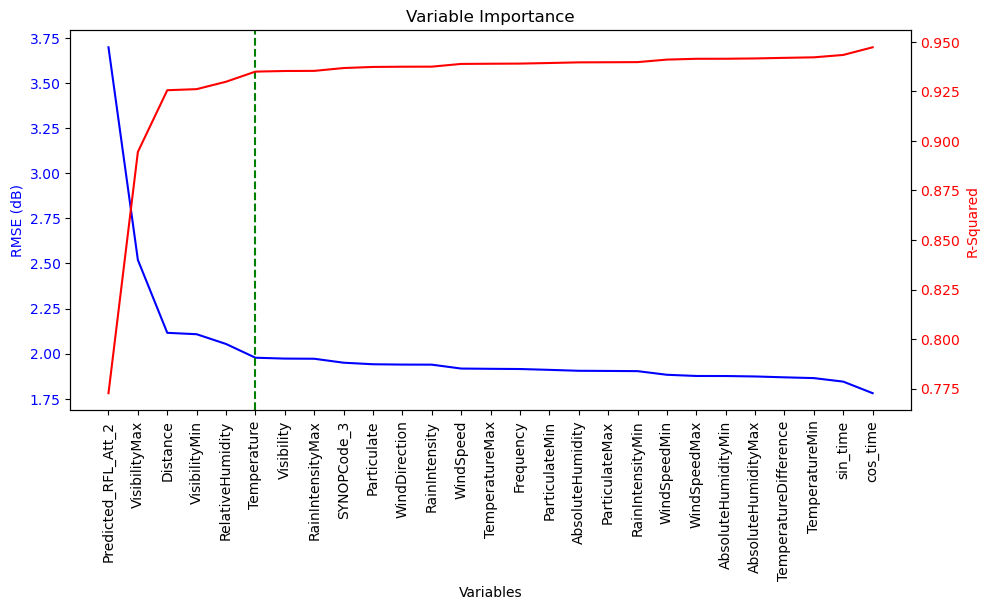

In [33]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO_2 = rankings_table_FSO_2.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO_2['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 5
cutoff_variable = rankings_table_sorted_FSO_2.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [34]:
selected_features_FSO_2 = [
    'Temperature',
    'RelativeHumidity',
    'VisibilityMin',
    'Distance',
    'VisibilityMax',
    'Predicted_RFL_Att_2'
]
# Select only the chosen features for training and testing
X_train_selected_FSO_2 = X_train_FSO[selected_features_FSO_2]
X_test_selected_FSO_2 = X_test_FSO[selected_features_FSO_2]


## Testing

In [35]:
final_model_FSO_2 = RandomForestRegressor(
    n_estimators=best_params_FSO_2['n_estimators'],
    max_depth=best_params_FSO_2['max_depth'],
    min_samples_split=best_params_FSO_2['min_samples_split'],
    min_samples_leaf=best_params_FSO_2['min_samples_leaf'],
    bootstrap=best_params_FSO_2['bootstrap'],
    random_state=42,
    oob_score=True
)
# Train the final model with the best parameters
final_model_FSO_2.fit(X_train_selected_FSO_2, y_train_FSO)


RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [36]:
# Use RF2 to predict FSO attenuation on the enhanced test data
predicted_FSO_2 = final_model_FSO_2.predict(X_test_selected_FSO_2)

# Calculate RMSE and R-squared on the FSO test data to evaluate RF2
test_rmse_FSO_2 = mean_squared_error(y_test_FSO, predicted_FSO_2, squared=False)
test_r2_FSO_2 = r2_score(y_test_FSO, predicted_FSO_2)

print(f"Test RMSE for FSO: {test_rmse_FSO_2}")
print(f"Test R^2 for FSO: {test_r2_FSO_2}")


Test RMSE for FSO: 2.4498317685579947
Test R^2 for FSO: 0.9260496378004605


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_26040\3905987687.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_26040\3905987687.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)


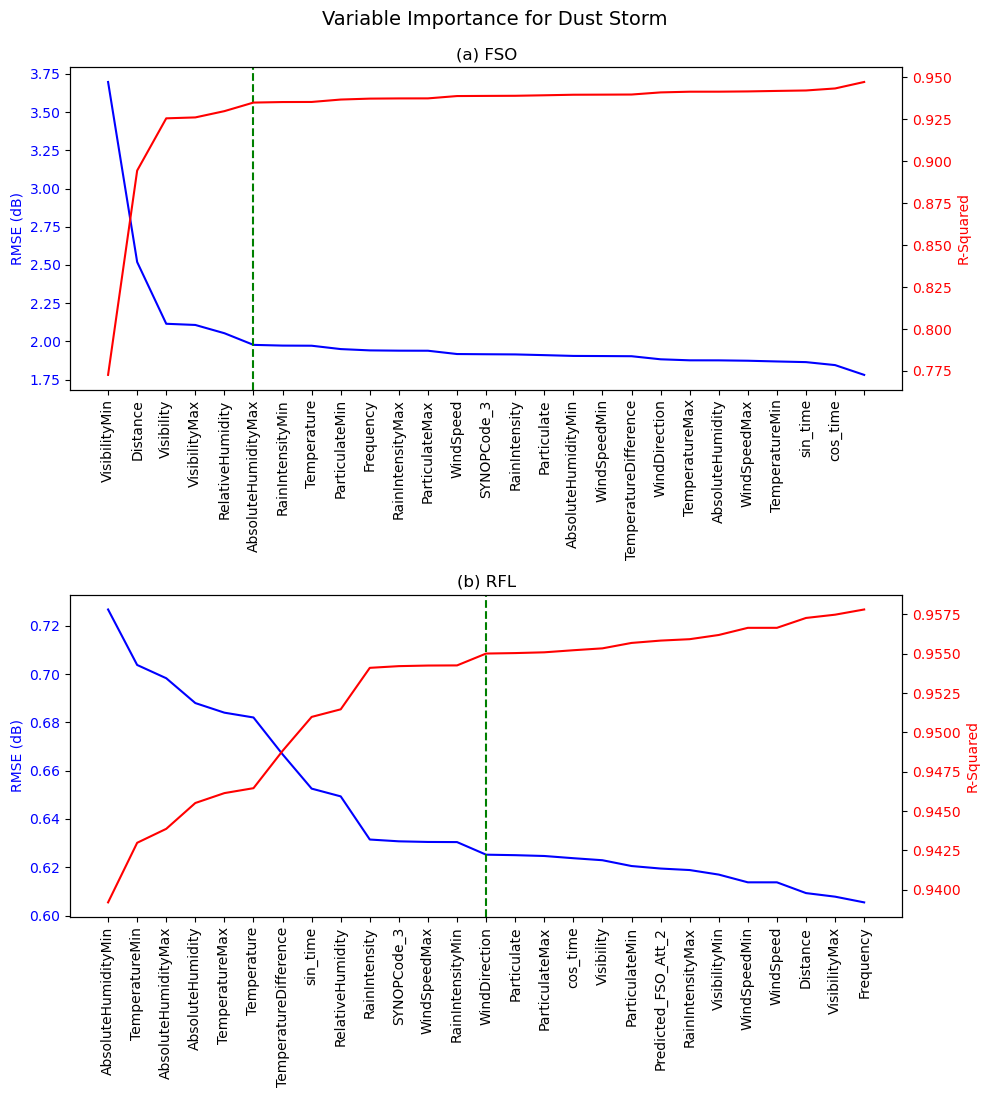

In [38]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Creating subplots with FSO on top and RFL at the bottom

# Plot for FSO
ax1.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax1.set_title('(a) FSO')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 5  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO_2.loc[cutoff_index_FSO, 'Removed Variable']
ax1.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Plot for RFL
ax2.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)
ax2.set_title('(b) RFL')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 13  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL_2.loc[cutoff_index_RFL, 'Removed Variable']
ax2.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance for Dust Storm', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()
